In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('diabetic_data.csv')
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Priprema za klasterovanje

### Brisanje nedostajućih vrednosti, enkodiranje, feature selection

In [3]:
bitni=['diag_1', 'diag_2', 'diag_3', 'max_glu_serum' ,'A1Cresult']


for b in bitni:
    most_frequent_value = data[b].mode().values[0]
    data[b] = data[b].replace(['?', 'None'], most_frequent_value)

In [4]:
data.drop(['race','weight','payer_code','medical_specialty','encounter_id','patient_nbr', 'examide', 'citoglipton'], axis=1,inplace=True)

In [5]:
feature_names = data.columns[0:]
feature_names

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for c in categorical_cols:
    data[c] = label_encoder.fit_transform(data[c])

In [7]:
kopija=data.copy()
kopija

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,6,25,1,1,41,0,1,0,...,0,1,1,0,0,0,0,1,0,2
1,0,1,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,0,1,1
2,0,2,1,1,7,2,11,5,13,2,...,0,1,1,0,0,0,0,1,1,2
3,1,3,1,1,7,2,44,1,16,0,...,0,3,1,0,0,0,0,0,1,2
4,1,4,1,1,7,1,51,0,8,0,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,1,3,7,3,51,0,16,0,...,0,0,1,0,0,0,0,0,1,1
101762,0,8,1,4,5,5,33,3,18,0,...,0,2,1,0,0,0,0,1,1,2
101763,1,7,1,1,7,1,53,0,9,1,...,0,0,1,0,0,0,0,0,1,2
101764,0,8,2,3,7,10,45,2,21,0,...,0,3,1,0,0,0,0,0,1,2


In [8]:
X = kopija.drop(['readmitted'], axis=1)

In [9]:
# y necemo raditi jer je ovo nenadgledano ucenje
#y = data['readmitted']

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [12]:
pca_names = [f'Komponenta {i}' for i in range(pca.n_components_)]
pca_names

['Komponenta 0', 'Komponenta 1']

In [13]:
pca.explained_variance_ratio_[:2].sum()


0.3836289327870556

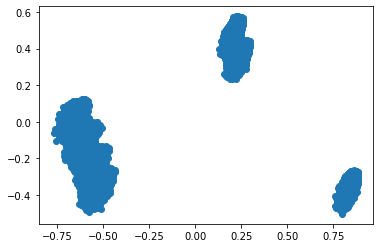

In [14]:
_ = plt.scatter(X[:, 0], X[:, 1])


In [15]:
pca

PCA(n_components=2)

## Klasterovanje

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

C:\Users\raden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raden\anaconda3\lib\site-packages\sklearn\clust

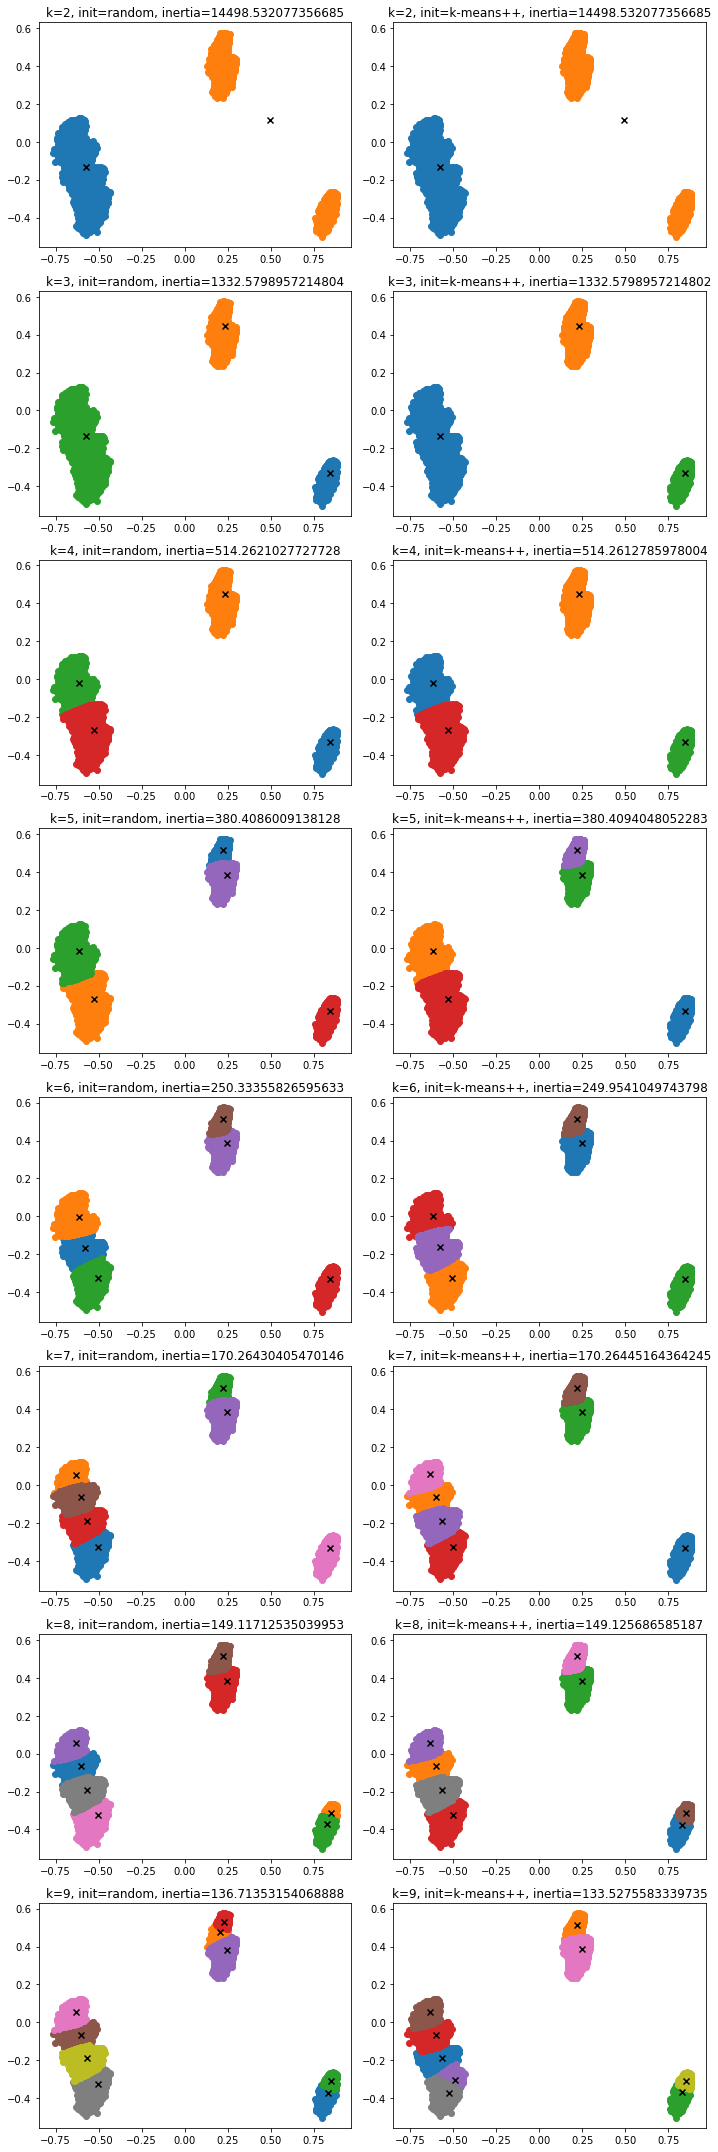

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ks = range(2, 10) 
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10, 30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init)
        kmeans.fit(X)
        
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))

        ax = fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for label in range(k):
            cluster = X[kmeans.labels_ == label]
            ax.scatter(cluster[:, 0], cluster[:, 1])
        
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pca_names)
        ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], color='black', marker='x')
        
        ax.set_title(f'k={k}, init={init}, inertia={kmeans.inertia_}')

plt.tight_layout()
plt.show()


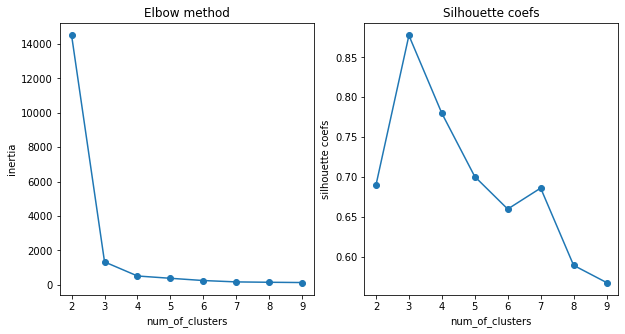

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

In [19]:
silhouette


[0.6901420642124987,
 0.877571248132134,
 0.7800686438336438,
 0.7007530691313438,
 0.6601227571613532,
 0.6864072917084068,
 0.5896503743910007,
 0.5680922011162881]

In [20]:
from sklearn.cluster import AgglomerativeClustering

atr=scaler.fit_transform(X)
aggl= AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)
aggl.fit(atr)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

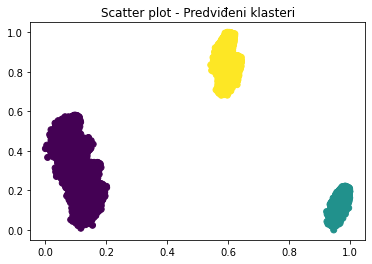

In [21]:
labels = aggl.labels_

plt.scatter(atr[:, 0], atr[:, 1], c=labels)

plt.title('Scatter plot - Predviđeni klasteri')
plt.show()

In [22]:
silhouette2 = silhouette_score(atr, aggl.labels_)

In [23]:
silhouette2

0.8532505426841923

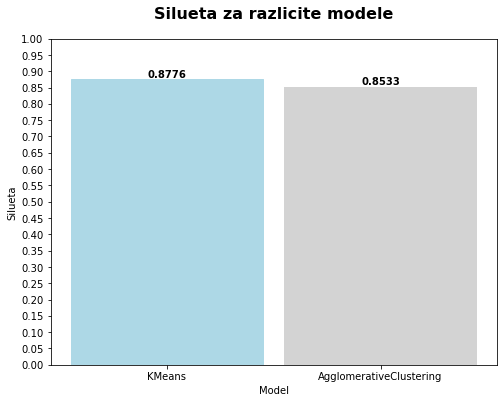

In [29]:
modeli = ['KMeans', 'AgglomerativeClustering']

silhouette_scores = [silhouette[1],silhouette2]
plt.figure(figsize=(8, 6))
bars = plt.bar(modeli, silhouette_scores, width=0.9, color=['lightgray', 'lightgray'])

#plt.bar(modeli, accuracy_scores,width=0.9,color='lightgray')
plt.xlabel('Model')
plt.ylabel('Silueta')
plt.title('Silueta za razlicite modele',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])  
plt.yticks([i/100 for i in range(0, 101, 5)])
max_index = silhouette_scores.index(max(silhouette_scores))
bars[max_index].set_color('lightblue')
for i, v in enumerate(silhouette_scores):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()